In [2]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results

ckpt_dir = 'abl5_3letters'

# delays
sweep_params_names = {
    'connection_type': ['f'],
    'delay': ['d'],
    'structure':['2l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# recurrent
sweep_params_names2 = {
    'connection_type': ['r'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# feedforward 4l
sweep_params_names3 = {
    'connection_type': ['f'],
    'delay': ['nd'],
    'structure':['4l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

# feedforward 2l
sweep_params_names4 = {
    'connection_type': ['f'],
    'delay': ['nd'],
    'structure':['2l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

sweep_params_names3 = {
    'connection_type': ['f'],
    'delay': ['nd'],
    'structure':['4l'],
    'tau_m':['hm', 'ht'],
    'T_freeze_taus':['ft', 'tt']
    }

acc_d, spk_d, spkt_d, _, _, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=1)
_, _, _, trnloss_d, tstloss_d, _, _ = get_results(ckpt_dir, sweep_params_names, rpts=1, mode='last')

acc_r, spk_r, spkt_r, _, _, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=1)
_, _, _, trnloss_r, tstloss_r, _, _ = get_results(ckpt_dir, sweep_params_names2, rpts=1, mode='last')

acc_f4, spk_f4, spkt_f4, _, _, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=1)
_, _, _, trnloss_f4, tstloss_f4, _, _ = get_results(ckpt_dir, sweep_params_names3, rpts=1, mode='last')

acc_f2, spk_f2, spkt_f2, _, _, _, _ = get_results(ckpt_dir, sweep_params_names4, rpts=1)
_, _, _, trnloss_f2, tstloss_f2, _, _ = get_results(ckpt_dir, sweep_params_names4, rpts=1, mode='last')

0.004286542534828186, 0.029374999925494194%
0.005806284490972757, 0.041015625%
0.007503379601985216, 0.0846354141831398%


In [3]:
def plot_boxplots(df):
    sns.set_theme(style="whitegrid")
    # Create the boxplot with customizations
    
    boxplot = sns.boxplot(data=df, palette="Set3")  # Use a color palette to add color

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10, color='darkred')

    # Add a grid with custom style
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Optional: Show median labels on each box
    for i, patch in enumerate(boxplot.artists):
        median_val = df.iloc[:, i].median()
        boxplot.text(i, median_val + 0.5, f'{median_val:.1f}%', ha='center', color='black', fontsize=10)

    return plt.gca()

Text(0, 0.5, 'Spikes per timestep')

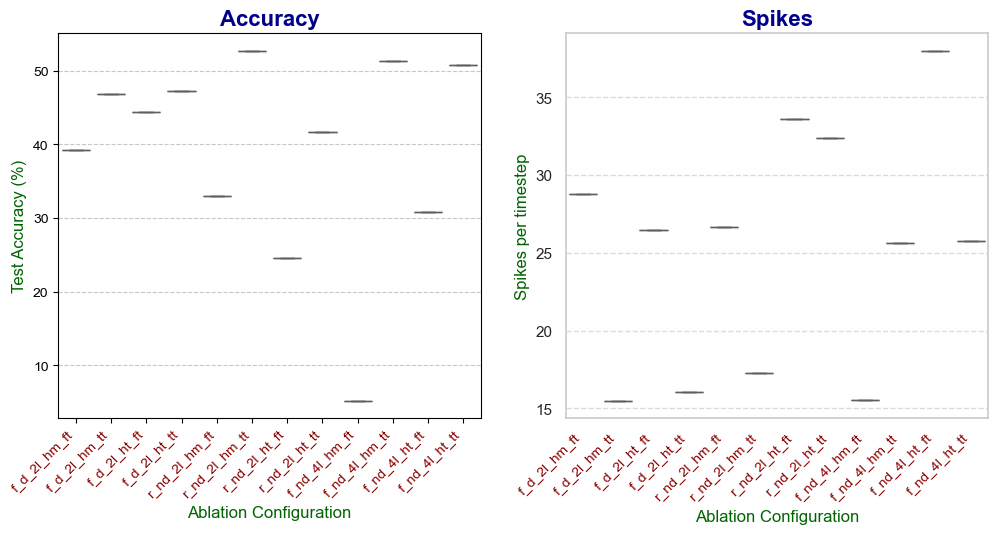

In [4]:
df_acc = pd.DataFrame(acc_d | acc_r | acc_f4)
df_spkt = pd.DataFrame(spkt_d | spkt_r | spkt_f4)
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_boxplots(df_acc)
plt.title("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Test Accuracy (%)", fontsize=12, color='darkgreen')
plt.subplot(122)
plot_boxplots(df_spkt)
plt.title("Spikes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ablation Configuration", fontsize=12, color='darkgreen')
plt.ylabel("Spikes per timestep", fontsize=12, color='darkgreen')